# <span style="color:royalblue"> [6주차] 2024 딥러닝의 이해 Long Short-Term Memory(LSTM)(feat. GRU) </span> 
# 2024 아파트 매매가 예측 모델링

--- 

<div style="text-align: right"> Final Edition : 2024.2.3<br>
    copyrightⓒ 2024 All rights reserved by Data Lover Pablo </div>

# [이론 및 원리] 
# 1. 딥러닝 이란?
 - 인간의 뇌에서 신경 세포를 사용하는 방식과 유사한 알고리즘을 사용하는 머신 러닝(ML) 
 - 여러 층(Layer)을 가진 인공 신경망(Artificial Neural Network, ANN)을 사용
 - y = wx + b의 형태를 가진 노드를 무수히 많이 연결한 것
 - 가중치 w를 구하기 위해 [역전파(BackPropagation) 알고리즘](https://wikidocs.net/37406)을 사용

 [기본 용어 설명]
 - 인공 신경망(Artificial Neural Network, ANN) : 인간의 학습 구조인 뉴런을 모방하여 만든 학습 알고리즘
 - 다층 퍼셉트론(Multi Layered Perceptrons) : 여러 개의 뉴런을 여러 층의 Layer로 쌓아 만든 다층구조의 인공신경망(딥러닝의 기본구조)

<center><img src="./data/edge.bmp" width = 800></center>

[역전파 알고리즘]

![역전파](./data/backpropagation.jpg)

**차근히 공부하기 좋은 참고자료**  
딥러닝을 이용한 자연어처리 [입문 딥러닝 학습방법](https://wikidocs.net/36033). [LSTM 해외정리](https://medium.com/swlh/a-technical-guide-on-rnn-lstm-gru-for-stock-price-prediction-bce2f7f30346)

## 1.1 딥러닝 알고리즘
- 심층 신경망(Deep Neural Network, DNN)
- 합성곱 신경망(Convolutional Neural Network, CNN)<br>
- <span style="color:royalblue">  순환 신경망(Recurrent Neural Network, RNN) </span>
- 제한 볼츠만 머신 (Restricted Boltzmann Machine, RBM)
- 심층 신뢰 신경망 (Deep Belief Network, DBN)
- 심층 Q-네트워크(Deep Q-Networks)

[before LSTM] You should know RNN

# 2. Recurrent Neural Network (RNN)
- 시계열을 가지는 순차적 데이터에 쓰이는 신경망

## 2.1 Feedforward Network and Sequential Data (순방향 신경망)

<br>
<center><img src="./data/hidden_state_extraction.png" width = 400></center>
<br>
[단점]  <br>
- 시간 인덱스의 각 값에 대한 별도의 매개변수 X를 가짐<br>  
- 다른 시간 인덱스에서 통계적 강점을 공유할 수 없음(Vanishing Gradient)

<br>
<center><img src="./data/state_dynamics.png" width = 550></center>
<br>

RNN의 장점은 이전 정보를 현재의 문제해결에 활용할 수 있다는 것이며, <br>단점은 현재 노드 위치와 먼 상태를 사용한 문맥 처리가 어렵다는 것입니다. 이러한 문제를 장기 의존성 문제 (Long-Term Dependency) 라고 합니다.

Vanilia RNN의 경우 hidden state 간의 연산이 time step이 길어질 수록 그 이전 hidden state의 정보를 잘 전달하지 못함

입력 Squence가 길어지면, gradient vanishing 문제가 발생 -> LSTM 개발

## [개념이해] Graident Vanishing(기울기 소실)
 Loss로 부터 back propagation을 통해 가중치 w를 구하기 위해 미분값을 곱해줄 때, 0~1사이의 값이 계속 곱해지면서 0으로 수렴하는 현상
* 현상
<center><img src="./data/vanishinggradient-1.png" width = 500, Height=1000></center>
* 원리
<center><img src="./data/vanish.png" width = 500></center>

# 3. LSTM Networks

## 3.1 Long-Term Dependencies

- 여러 단계에 걸쳐 전파된 그라디언트는 사라지거나 폭증하는 경향이 있음

- 장기 의존성에 대한 어려움은 장기 상호작용에 부여된 가중치가 기하급수적으로 작기 때문에 발생

- 선형 연산자만을 통해 실행되는 메모리 상태(Cell state) 도입

- 게이트 장치(gating unit)를 사용하여 상태 업데이트 제어


<br>
<center><img src="./data/vanishing_gradient.png" width = 500, Height = 300></center>
<br>


Example: "I grew up in France… I speak fluent _French_."

<br>
<center><img src="./data/RNN-longtermdependencies.png" width = 500></center>
<br>


## 3.2 LSTM 특징

- 메모리 셀과 게이팅 유닛 세트로 구성
- 메모리 셀은 다음 셀로 이월되는 컨텍스트
- Forget gate 는 지우기 작업을 제어
- Input gate 는 입력(쓰기) 작업을 제어
- Output gate 는 출력(읽기) 작업을 제어

<br>
<center><img src="./data/gates_lstm.png" width = 550></center>

## 3.3 LSTM for Prediction(회귀예측)

<br><br>
<center><img src='./data/RNNforpre.png' width = 500></center>

- i : input gate <br>
- f : forget gate <br>
- o : output gate<br>
- g : update gate<br>
- c<sub>t</sub> : <span style="color:royalblue"> 장기기억메모리</span>
- h<sub>t</sub> : 단기기억메모리

**<center> c<sub>t</sub> = f ⊙ c<sub>t-1</sub>   +   i⊙g<br> </center>**

1) f : 0과 1 사이의 값. f=0이면 c<sub>t</sub>(장기기억메모리)를 지움. f=1이면 Gradient를 잘 흘려보낼 수 있음.<br>
2) i : 0과 1 사이의 값. i=1이면 c<sub>t</sub>(장기기억메모리)를 g만큼 업데이트<br>

**<center>h<sub>t</sub> = o ⊙ tanh(c<sub>t</sub>)<br></center>** 

3) g : Hyperblolic Tagent를 통해서 나온 -1 ~ 1 사이의 값.<br>
4) o : o가 1일 경우, h<sub>t</sub>(단기기억메모리)를 그대로 가져옴

<center><img src="./data/lstm.png" width = 550></center>

<center><img src="./data/fomula.png" width = 250></center>

---

# 1. 데이터 로드

In [22]:
# !pip install --user tensorflow==2.13.0

In [10]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [11]:
import pickle
with open( "월별부동산데이터_2023", "rb" ) as file:
    raw_df = pickle.load(file)

In [13]:
raw_df.tail()

,강남구_매매지수,강남구_전세지수,서울_인허가물량,서울_분양물량,DFF,NASDAQCOM,CSUSHPISA,CORESTICKM159SFRBATL,HSN1F,USSTHPI,GDP,WM2NS,ICSA,gangnam_price(만원)
2023-08-01,95.993766,81.438153,834.0,2111.0,5.33,14283.91,309.226,5.217343,654.0,657.32,27610.128,20717.1,227000.0,142613
2023-09-01,96.624532,81.770394,408.0,373.0,5.33,14031.81,311.255,5.008782,698.0,657.32,27610.128,20662.8,229000.0,143692
2023-10-01,97.045327,82.233577,2071.0,2105.0,5.33,13219.32,313.276,4.931956,676.0,657.32,27938.831,20609.8,209000.0,144485
2023-11-01,97.245942,82.808694,937.0,531.0,5.33,13061.47,313.276,4.730629,615.0,657.32,27938.831,20600.9,220000.0,144875
2023-12-01,97.260064,83.228152,937.0,531.0,5.33,14305.03,313.276,4.584186,664.0,657.32,27938.831,20770.2,219000.0,144755


In [14]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 132 entries, 2013-01-01 to 2023-12-01
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   강남구_매매지수              132 non-null    float64
 1   강남구_전세지수              132 non-null    float64
 2   서울_인허가물량              132 non-null    float64
 3   서울_분양물량               132 non-null    float64
 4   DFF                   132 non-null    float64
 5   NASDAQCOM             132 non-null    float64
 6   CSUSHPISA             132 non-null    float64
 7   CORESTICKM159SFRBATL  132 non-null    float64
 8   HSN1F                 132 non-null    float64
 9   USSTHPI               132 non-null    float64
 10  GDP                   132 non-null    float64
 11  WM2NS                 132 non-null    float64
 12  ICSA                  132 non-null    float64
 13  gangnam_price(만원)     132 non-null    int32  
dtypes: float64(13), int32(1)
memory usage: 15.0 KB


# 2. 결측치 확인 및 제거

In [15]:
# Missing Data 확인

raw_df.isnull().sum()

강남구_매매지수                0
강남구_전세지수                0
서울_인허가물량                0
서울_분양물량                 0
DFF                     0
NASDAQCOM               0
CSUSHPISA               0
CORESTICKM159SFRBATL    0
HSN1F                   0
USSTHPI                 0
GDP                     0
WM2NS                   0
ICSA                    0
gangnam_price(만원)       0
dtype: int64

In [16]:
# 최소값이 0 인 column 체크

for col in raw_df.columns:

    if raw_df[col].min() == 0:
        col_name = col
        print(col_name, type(col_name))

서울_분양물량 <class 'str'>


In [17]:
raw_df.describe()

,강남구_매매지수,강남구_전세지수,서울_인허가물량,서울_분양물량,DFF,NASDAQCOM,CSUSHPISA,CORESTICKM159SFRBATL,HSN1F,USSTHPI,GDP,WM2NS,ICSA,gangnam_price(만원)
count,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,1.320000e+02,132.000000
mean,74.709702,79.250839,5817.318182,1164.568182,1.141742,8071.677917,214.718530,2.872826,614.030303,444.212727,21036.022568,15367.608333,3.861288e+05,96332.287879
std,16.370416,10.520561,3274.159225,1191.953610,1.495886,3702.615558,50.233234,1.343721,137.909415,103.951875,3242.458728,3850.898655,5.973309e+05,34612.835998
min,54.848755,61.167145,408.000000,0.000000,0.050000,3019.510000,146.825000,1.517012,375.000000,316.690000,16648.189000,10398.200000,1.980000e+05,56957.000000
25%,59.428616,73.374450,3655.750000,287.250000,0.080000,4905.962500,174.550250,2.088426,512.750000,362.235000,18426.759250,12075.800000,2.230000e+05,61635.500000
50%,73.647897,77.599322,5246.500000,735.000000,0.365000,7297.205000,202.569500,2.406594,610.000000,419.335000,20454.732500,13990.800000,2.605000e+05,90346.000000
75%,91.267567,82.690281,7329.500000,1665.250000,1.745000,11405.222500,246.378500,2.686547,693.500000,490.557500,22773.229250,19747.900000,3.205000e+05,130772.250000
max,101.672701,100.000000,16962.000000,6830.000000,5.330000,15644.970000,313.276000,6.617223,1029.000000,657.320000,27938.831000,21845.500000,5.946000e+06,153099.000000


In [18]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 132 entries, 2013-01-01 to 2023-12-01
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   강남구_매매지수              132 non-null    float64
 1   강남구_전세지수              132 non-null    float64
 2   서울_인허가물량              132 non-null    float64
 3   서울_분양물량               132 non-null    float64
 4   DFF                   132 non-null    float64
 5   NASDAQCOM             132 non-null    float64
 6   CSUSHPISA             132 non-null    float64
 7   CORESTICKM159SFRBATL  132 non-null    float64
 8   HSN1F                 132 non-null    float64
 9   USSTHPI               132 non-null    float64
 10  GDP                   132 non-null    float64
 11  WM2NS                 132 non-null    float64
 12  ICSA                  132 non-null    float64
 13  gangnam_price(만원)     132 non-null    int32  
dtypes: float64(13), int32(1)
memory usage: 15.0 KB


In [19]:
raw_df

,강남구_매매지수,강남구_전세지수,서울_인허가물량,서울_분양물량,DFF,NASDAQCOM,CSUSHPISA,CORESTICKM159SFRBATL,HSN1F,USSTHPI,GDP,WM2NS,ICSA,gangnam_price(만원)
2013-01-01,55.539231,61.167145,3789.0,202.0,0.09,3019.51,146.825,2.068297,446.0,316.69,16648.189,10615.7,362000.0,59892
2013-02-01,55.444490,61.844689,3090.0,63.0,0.14,3179.10,147.783,2.146017,447.0,316.69,16648.189,10398.2,366000.0,59568
2013-03-01,55.509901,62.332408,4127.0,252.0,0.14,3169.74,149.962,2.099902,444.0,316.69,16648.189,10448.6,342000.0,59440
2013-04-01,55.479130,62.341758,5314.0,560.0,0.16,3239.17,151.517,1.935432,441.0,321.52,16728.687,10720.4,375000.0,57388
2013-05-01,55.585253,62.361958,6206.0,432.0,0.14,3299.13,152.848,1.907797,428.0,321.52,16728.687,10531.7,331000.0,57403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-01,95.993766,81.438153,834.0,2111.0,5.33,14283.91,309.226,5.217343,654.0,657.32,27610.128,20717.1,227000.0,142613
2023-09-01,96.624532,81.770394,408.0,373.0,5.33,14031.81,311.255,5.008782,698.0,657.32,27610.128,20662.8,229000.0,143692
2023-10-01,97.045327,82.233577,2071.0,2105.0,5.33,13219.32,313.276,4.931956,676.0,657.32,27938.831,20609.8,209000.0,144485
2023-11-01,97.245942,82.808694,937.0,531.0,5.33,13061.47,313.276,4.730629,615.0,657.32,27938.831,20600.9,220000.0,144875


# 3. 이상치 확인 및 제거

EDA 데이터 시각화 

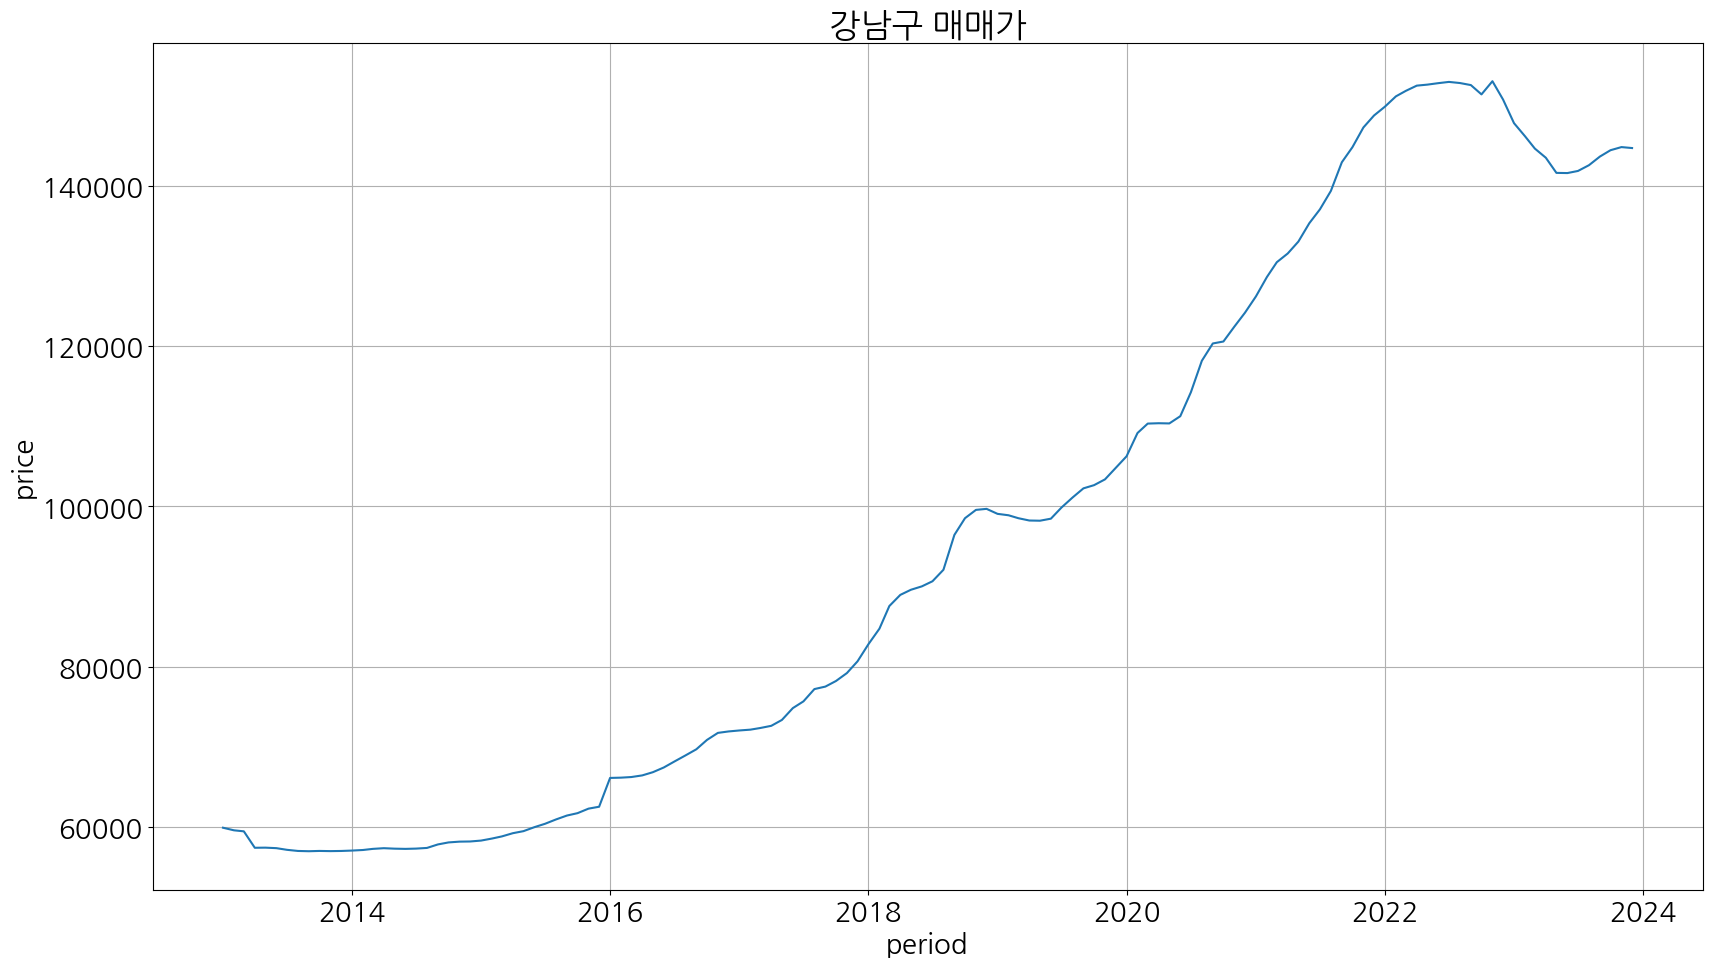

In [23]:
# 한글폰트 설정
# 1. 기본 스타일 설정
plt.style.use('default')
plt.rcParams['figure.figsize'] = (20, 11)
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['font.size'] = 20

plt.title('강남구 매매가')
plt.ylabel('price')
plt.xlabel('period')
plt.grid()

plt.plot(raw_df['gangnam_price(만원)'], label='강남구 매매가')

plt.show()

# 4. 변수선택
- 변수명 변경 : 딥러닝은 한글 변수명에 대한 오류가 있을 수 있어 전부 영어로 바꿔줍니다.

In [24]:
raw_df.columns

Index(['강남구_매매지수', '강남구_전세지수', '서울_인허가물량', '서울_분양물량', 'DFF', 'NASDAQCOM',
       'CSUSHPISA', 'CORESTICKM159SFRBATL', 'HSN1F', 'USSTHPI', 'GDP', 'WM2NS',
       'ICSA', 'gangnam_price(만원)'],
      dtype='object')

In [28]:
raw_df.columns=['price_idx', 'rent_idx', 'permission', 'presale', 'DFF', 'NASDAQCOM',
       'CSUSHPISA', 'CORESTICKM159SFRBATL', 'HSN1F', 'USSTHPI', 'GDP', 'WM2NS',
       'ICSA', 'gangnam_price']

In [29]:
raw_df['gangnam_price'] = raw_df['gangnam_price'].astype(float)

In [30]:
raw_df

,price_idx,rent_idx,permission,presale,DFF,NASDAQCOM,CSUSHPISA,CORESTICKM159SFRBATL,HSN1F,USSTHPI,GDP,WM2NS,ICSA,gangnam_price
2013-01-01,55.539231,61.167145,3789.0,202.0,0.09,3019.51,146.825,2.068297,446.0,316.69,16648.189,10615.7,362000.0,59892.0
2013-02-01,55.444490,61.844689,3090.0,63.0,0.14,3179.10,147.783,2.146017,447.0,316.69,16648.189,10398.2,366000.0,59568.0
2013-03-01,55.509901,62.332408,4127.0,252.0,0.14,3169.74,149.962,2.099902,444.0,316.69,16648.189,10448.6,342000.0,59440.0
2013-04-01,55.479130,62.341758,5314.0,560.0,0.16,3239.17,151.517,1.935432,441.0,321.52,16728.687,10720.4,375000.0,57388.0
2013-05-01,55.585253,62.361958,6206.0,432.0,0.14,3299.13,152.848,1.907797,428.0,321.52,16728.687,10531.7,331000.0,57403.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-01,95.993766,81.438153,834.0,2111.0,5.33,14283.91,309.226,5.217343,654.0,657.32,27610.128,20717.1,227000.0,142613.0
2023-09-01,96.624532,81.770394,408.0,373.0,5.33,14031.81,311.255,5.008782,698.0,657.32,27610.128,20662.8,229000.0,143692.0
2023-10-01,97.045327,82.233577,2071.0,2105.0,5.33,13219.32,313.276,4.931956,676.0,657.32,27938.831,20609.8,209000.0,144485.0
2023-11-01,97.245942,82.808694,937.0,531.0,5.33,13061.47,313.276,4.730629,615.0,657.32,27938.831,20600.9,220000.0,144875.0


# 5. 데이터 정규화

- 1	StandardScaler	기본 스케일. 평균과 표준편차 사용
- 2	MinMaxScaler	최대/최소값이 각각 1, 0이 되도록 스케일링
- 3	MaxAbsScaler	최대절대값과 0이 각각 1, 0이 되도록 스케일링
- 4	RobustScaler	중앙값(median)과 IQR(interquartile range) 사용. 아웃라이어의 영향을 최소화

## 5.1 스케일러는 MinMaxScaler 를 사용하고, 데이터를 0과 1사이 값으로 변환해줍니다.

In [31]:
from sklearn.preprocessing import MinMaxScaler

scaled_df = pd.DataFrame(index=raw_df.index)
[]
# x 변수 정규화 
scaler = MinMaxScaler()
scaled_df[['price_idx', 'rent_idx', 'permission', 'presale', 'DFF', 'NASDAQCOM', 'CSUSHPISA', 'CORESTICKM159SFRBATL', 'HSN1F', 'USSTHPI', 'GDP', 'WM2NS', 'ICSA', 'gangnam_price']] = scaler.fit_transform(raw_df[['price_idx', 'rent_idx', 'permission', 'presale', 'DFF', 'NASDAQCOM', 'CSUSHPISA', 'CORESTICKM159SFRBATL', 'HSN1F', 'USSTHPI', 'GDP', 'WM2NS', 'ICSA', 'gangnam_price']])

In [32]:
scaled_df

,price_idx,rent_idx,permission,presale,DFF,NASDAQCOM,CSUSHPISA,CORESTICKM159SFRBATL,HSN1F,USSTHPI,GDP,WM2NS,ICSA,gangnam_price
2013-01-01,0.014746,0.000000,0.204241,0.029575,0.007576,0.000000,0.000000,0.108091,0.108563,0.00000,0.000000,0.019000,0.028532,0.030528
2013-02-01,0.012723,0.017448,0.162015,0.009224,0.017045,0.012640,0.005755,0.123329,0.110092,0.00000,0.000000,0.000000,0.029228,0.027158
2013-03-01,0.014120,0.030007,0.224659,0.036896,0.017045,0.011899,0.018846,0.114288,0.105505,0.00000,0.000000,0.004403,0.025052,0.025826
2013-04-01,0.013463,0.030248,0.296363,0.081991,0.020833,0.017398,0.028188,0.082040,0.100917,0.01418,0.007130,0.028146,0.030793,0.004483
2013-05-01,0.015729,0.030768,0.350248,0.063250,0.017045,0.022147,0.036185,0.076621,0.081040,0.01418,0.007130,0.011662,0.023138,0.004639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-01,0.878717,0.522007,0.025734,0.309078,1.000000,0.892197,0.975669,0.725525,0.426606,1.00000,0.970887,0.901427,0.005045,0.890932
2023-09-01,0.892188,0.530562,0.000000,0.054612,1.000000,0.872230,0.987858,0.684633,0.493884,1.00000,0.970887,0.896683,0.005393,0.902155
2023-10-01,0.901175,0.542490,0.100459,0.308199,1.000000,0.807876,1.000000,0.669569,0.460245,1.00000,1.000000,0.892053,0.001914,0.910403
2023-11-01,0.905459,0.557300,0.031956,0.077745,1.000000,0.795374,1.000000,0.630095,0.366972,1.00000,1.000000,0.891276,0.003827,0.914460


## 5.2 Y값은 추후 정규화된 값을 원래값으로 변환해 주기 위해 별도 Scaler 사용

In [33]:
scaler1 = MinMaxScaler()
scaled_df['gangnam_price'] = scaler1.fit_transform(raw_df['gangnam_price'].values.reshape(-1,1))

In [34]:
scaled_df

,price_idx,rent_idx,permission,presale,DFF,NASDAQCOM,CSUSHPISA,CORESTICKM159SFRBATL,HSN1F,USSTHPI,GDP,WM2NS,ICSA,gangnam_price
2013-01-01,0.014746,0.000000,0.204241,0.029575,0.007576,0.000000,0.000000,0.108091,0.108563,0.00000,0.000000,0.019000,0.028532,0.030528
2013-02-01,0.012723,0.017448,0.162015,0.009224,0.017045,0.012640,0.005755,0.123329,0.110092,0.00000,0.000000,0.000000,0.029228,0.027158
2013-03-01,0.014120,0.030007,0.224659,0.036896,0.017045,0.011899,0.018846,0.114288,0.105505,0.00000,0.000000,0.004403,0.025052,0.025826
2013-04-01,0.013463,0.030248,0.296363,0.081991,0.020833,0.017398,0.028188,0.082040,0.100917,0.01418,0.007130,0.028146,0.030793,0.004483
2013-05-01,0.015729,0.030768,0.350248,0.063250,0.017045,0.022147,0.036185,0.076621,0.081040,0.01418,0.007130,0.011662,0.023138,0.004639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-01,0.878717,0.522007,0.025734,0.309078,1.000000,0.892197,0.975669,0.725525,0.426606,1.00000,0.970887,0.901427,0.005045,0.890932
2023-09-01,0.892188,0.530562,0.000000,0.054612,1.000000,0.872230,0.987858,0.684633,0.493884,1.00000,0.970887,0.896683,0.005393,0.902155
2023-10-01,0.901175,0.542490,0.100459,0.308199,1.000000,0.807876,1.000000,0.669569,0.460245,1.00000,1.000000,0.892053,0.001914,0.910403
2023-11-01,0.905459,0.557300,0.031956,0.077745,1.000000,0.795374,1.000000,0.630095,0.366972,1.00000,1.000000,0.891276,0.003827,0.914460


## 5.3 데이터 셋 준비

In [35]:
# 입력 파라미터 feature, label => numpy type

def make_sequene_dataset(feature, label, window_size):

    feature_list = []      # 생성될 feature list
    label_list = []        # 생성될 label list

    for i in range(len(feature)-window_size):

        feature_list.append(feature[i:i+window_size])
        label_list.append(label[i+window_size])

    return np.array(feature_list), np.array(label_list)

## 5.4 feature_df, label_df 생성

In [36]:
feature_cols = ['rent_idx','price_idx', 'USSTHPI','CSUSHPISA']#, 'permission', 'unsold', 'NASDAQCOM','price_idx', 
       #', 'HSN1F', 'INTDSRUSM193N', 'USSTHPI', 'M2', 'ICSA']

label_cols = ['gangnam_price']

feature_df = pd.DataFrame(scaled_df, columns=feature_cols, index=raw_df.index)
label_df = pd.DataFrame(scaled_df, columns=label_cols, index=raw_df.index)

In [37]:
# DataFrame => Numpy 변환

feature_np = feature_df.to_numpy()
label_np = label_df.to_numpy()

print(feature_np.shape, label_np.shape)

(132, 4) (132, 1)


## 5.5 학습 데이터 구조(중요)
입력데이터는 (Batch size, time steps, input dims)의 3차원 Tensor(텐서) 형태

- Batch Size : 데이터의 총 갯수 ex) 전체 학습 데이터는 126개 행. 한번에 학습시킬 양(Batach size)만큼 모델에 입력
- time steps : time steps = window size. 한번에 들어가는 데이터의 수. ex) 12개월의 데이터를 보고 그 다음 달의 값을 예측
- input dims : 예측에 사용하는 변수의 갯수(차원수). LSTM Layer로 한번에 들어가는 데이터의 갯수.   
  ex) 매매가 예측에 매매지수, 전세지수, 케이스쉴러지수, US주택가격지수 4가지 변수를 사용하면 input dims = 4 차원

In [38]:
window_size = 12 

X, Y = make_sequene_dataset(feature_np, label_np, window_size)

print(X.shape, Y.shape)

(120, 12, 4) (120, 1)


In [39]:
# train, test 분리
#split = int(len(X)*0.95) # 비율로 변경할 경우

split = -36

x_train = X[0:split]
y_train = Y[0:split]

x_test = X[split:]
y_test = Y[split:]

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(84, 12, 4) (84, 1)
(36, 12, 4) (36, 1)


In [40]:
x_train[0].shape

(12, 4)

# 6. 모델 생성 및 학습

[스탠포드 CS231n - RNN/LSTM 요약정리 블로그](https://ratsgo.github.io/natural%20language%20processing/2017/03/09/rnnlstm/)  
[스탠포드 CS231N 강의 원본](https://www.youtube.com/watch?v=6niqTuYFZLQ)

## 6-3 딥러닝 LSTM 모델

In [41]:
# 시계열 model 생성
model = Sequential()

# LSTM Hidden layer(은닉층)을 추가. # input_shape = (12,4) = (time steps, input_dims)
model.add(LSTM(128, activation='tanh', input_shape=x_train[0].shape))

# GRU(Gated Reccurent Units) Hidden layer(은닉층)을 추가
# model.add(GRU(256, activation='tanh', input_shape=x_train[0].shape))

# Output layer 출력 층 추가. 
# 회귀분석의 마지막 출력층의 activation은 linear 입니다. cf. Classification의 마지막 출력층의 activation은 'softmax'(다중)/'sigmoid'(이진) 입니다.
model.add(Dense(1, activation='linear'))

## 1) Optimizer
옵티마이저란? 딥러닝에서 학습하는 최적화 알고리즘을 말합니다.<br>

손실 함수(loss funciton)의 최솟값을 찾아나가는 전파(Backpropagation) 과정에서
한 스텝마다 움직이는 보폭의 크기, 즉 보폭이 학습률(learning rate)로 정의되고,
이동할 방향은 현 지점의 기울기(gradient)를 말합니다.

대표적으로는 SGD, Adam, Adagrad 등이 있습니다. 최근 논문 SAM등 Optimizer를 개발하여 모델성능 향상

[잘 정리된 블로그](https://velog.io/@yookyungkho/%EB%94%A5%EB%9F%AC%EB%8B%9D-%EC%98%B5%ED%8B%B0%EB%A7%88%EC%9D%B4%EC%A0%80-%EC%A0%95%EB%B3%B5%EA%B8%B0%EB%B6%80%EC%A0%9C-CS231n-Lecture7-Review)

<center><img src="./data/ChoosingStep.png"></center>

## 2) loss
MSE(Mean Squared Error)평귡 제곱 오차. 정답에 가까울수록 작은 값이 나옴
<center><img src="./data/MSE.jpg" width = 300></center>

## 3)  Activation Function 활성화 함수
activation = tanh 기본

<center><img src="./data/activation_func_1.png" width = 550></center>

In [42]:
model.compile(optimizer = 'adam', 
                     loss = 'mean_squared_error', 
                     metrics = ['mse'])

# tf.keras.optimizers.Adam(learning_rate=0.01)
# model.compile(optimizer = 'Adam', 
#                      loss = 'mean_squared_error', 
#                      metrics = ['mse'])


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               68096     
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 68225 (266.50 KB)
Trainable params: 68225 (266.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [43]:
# from tensorflow.keras.callbacks import EarlyStopping

# early_stop = EarlyStopping(monitor='val_loss', patience=5)

model.fit(x_train, y_train, 
          validation_data=(x_test, y_test),
          epochs=200, batch_size=12)#,
#           callbacks=[early_stop])

Epoch 1/200
7/7 [==============================] - 3s 114ms/step - loss: 0.0419 - mse: 0.0419 - val_loss: 0.0381 - val_mse: 0.0381
Epoch 2/200
7/7 [==============================] - 0s 15ms/step - loss: 0.0123 - mse: 0.0123 - val_loss: 0.0363 - val_mse: 0.0363
Epoch 3/200
7/7 [==============================] - 0s 16ms/step - loss: 0.0085 - mse: 0.0085 - val_loss: 0.0135 - val_mse: 0.0135
Epoch 4/200
7/7 [==============================] - 0s 14ms/step - loss: 0.0037 - mse: 0.0037 - val_loss: 0.0491 - val_mse: 0.0491
Epoch 5/200
7/7 [==============================] - 0s 11ms/step - loss: 0.0016 - mse: 0.0016 - val_loss: 0.0161 - val_mse: 0.0161
Epoch 6/200
7/7 [==============================] - 0s 12ms/step - loss: 8.2507e-04 - mse: 8.2507e-04 - val_loss: 0.0570 - val_mse: 0.0570
Epoch 7/200
7/7 [==============================] - 0s 12ms/step - loss: 5.4041e-04 - mse: 5.4041e-04 - val_loss: 0.0634 - val_mse: 0.0634
Epoch 8/200
7/7 [==============================] - 0s 19ms/step - loss: 4

7/7 [==============================] - 0s 30ms/step - loss: 3.6953e-04 - mse: 3.6953e-04 - val_loss: 0.0838 - val_mse: 0.0838
Epoch 61/200
7/7 [==============================] - 0s 19ms/step - loss: 2.9291e-04 - mse: 2.9291e-04 - val_loss: 0.0986 - val_mse: 0.0986
Epoch 62/200
7/7 [==============================] - 0s 25ms/step - loss: 2.4992e-04 - mse: 2.4992e-04 - val_loss: 0.1015 - val_mse: 0.1015
Epoch 63/200
7/7 [==============================] - 0s 25ms/step - loss: 2.6632e-04 - mse: 2.6632e-04 - val_loss: 0.1122 - val_mse: 0.1122
Epoch 64/200
7/7 [==============================] - 0s 16ms/step - loss: 2.6624e-04 - mse: 2.6624e-04 - val_loss: 0.1071 - val_mse: 0.1071
Epoch 65/200
7/7 [==============================] - 0s 12ms/step - loss: 2.5779e-04 - mse: 2.5779e-04 - val_loss: 0.0855 - val_mse: 0.0855
Epoch 66/200
7/7 [==============================] - 0s 13ms/step - loss: 2.7976e-04 - mse: 2.7976e-04 - val_loss: 0.1212 - val_mse: 0.1212
Epoch 67/200
7/7 [======================

Epoch 119/200
7/7 [==============================] - 0s 24ms/step - loss: 3.2848e-04 - mse: 3.2848e-04 - val_loss: 0.1123 - val_mse: 0.1123
Epoch 120/200
7/7 [==============================] - 0s 19ms/step - loss: 2.1078e-04 - mse: 2.1078e-04 - val_loss: 0.1076 - val_mse: 0.1076
Epoch 121/200
7/7 [==============================] - 0s 28ms/step - loss: 2.1346e-04 - mse: 2.1346e-04 - val_loss: 0.1282 - val_mse: 0.1282
Epoch 122/200
7/7 [==============================] - 0s 21ms/step - loss: 2.0799e-04 - mse: 2.0799e-04 - val_loss: 0.1364 - val_mse: 0.1364
Epoch 123/200
7/7 [==============================] - 0s 26ms/step - loss: 2.2220e-04 - mse: 2.2220e-04 - val_loss: 0.1245 - val_mse: 0.1245
Epoch 124/200
7/7 [==============================] - 0s 21ms/step - loss: 1.9561e-04 - mse: 1.9561e-04 - val_loss: 0.1210 - val_mse: 0.1210
Epoch 125/200
7/7 [==============================] - 0s 28ms/step - loss: 1.9137e-04 - mse: 1.9137e-04 - val_loss: 0.1238 - val_mse: 0.1238
Epoch 126/200
7/7 [=

7/7 [==============================] - 0s 27ms/step - loss: 2.4097e-04 - mse: 2.4097e-04 - val_loss: 0.1244 - val_mse: 0.1244
Epoch 178/200
7/7 [==============================] - 0s 23ms/step - loss: 2.3518e-04 - mse: 2.3518e-04 - val_loss: 0.1250 - val_mse: 0.1250
Epoch 179/200
7/7 [==============================] - 0s 24ms/step - loss: 2.3523e-04 - mse: 2.3523e-04 - val_loss: 0.1410 - val_mse: 0.1410
Epoch 180/200
7/7 [==============================] - 0s 21ms/step - loss: 2.7295e-04 - mse: 2.7295e-04 - val_loss: 0.1720 - val_mse: 0.1720
Epoch 181/200
7/7 [==============================] - 0s 24ms/step - loss: 2.4371e-04 - mse: 2.4371e-04 - val_loss: 0.1827 - val_mse: 0.1827
Epoch 182/200
7/7 [==============================] - 0s 21ms/step - loss: 3.0866e-04 - mse: 3.0866e-04 - val_loss: 0.1503 - val_mse: 0.1503
Epoch 183/200
7/7 [==============================] - 0s 19ms/step - loss: 2.3154e-04 - mse: 2.3154e-04 - val_loss: 0.1401 - val_mse: 0.1401
Epoch 184/200
7/7 [===============

In [44]:
# y값을 원래로 되돌리기 (scaling 한 값에서 inverse)
rescaled_actual = scaler1.inverse_transform(scaled_df['gangnam_price'][split:].values.reshape(-1,1))

pred = model.predict(x_test)
rescaled_pred = scaler1.inverse_transform(np.array(pred).reshape(-1,1))

2/2 [==============================] - 0s 14ms/step


In [45]:
# 실제값과 예측값 데이터 프레임 만들기
rescaled_pred_df = pd.DataFrame(np.concatenate((rescaled_actual, rescaled_pred), axis=1), columns=['actual', 'predict'], index=raw_df.index[-36:])
rescaled_pred_df.astype('int')

,actual,predict
2021-01-01,126230,130138
2021-02-01,128650,133960
2021-03-01,130498,137504
2021-04-01,131592,140552
2021-05-01,133074,143414
2021-06-01,135371,146427
2021-07-01,137101,150049
2021-08-01,139403,154148
2021-09-01,142980,158613
2021-10-01,144865,163164


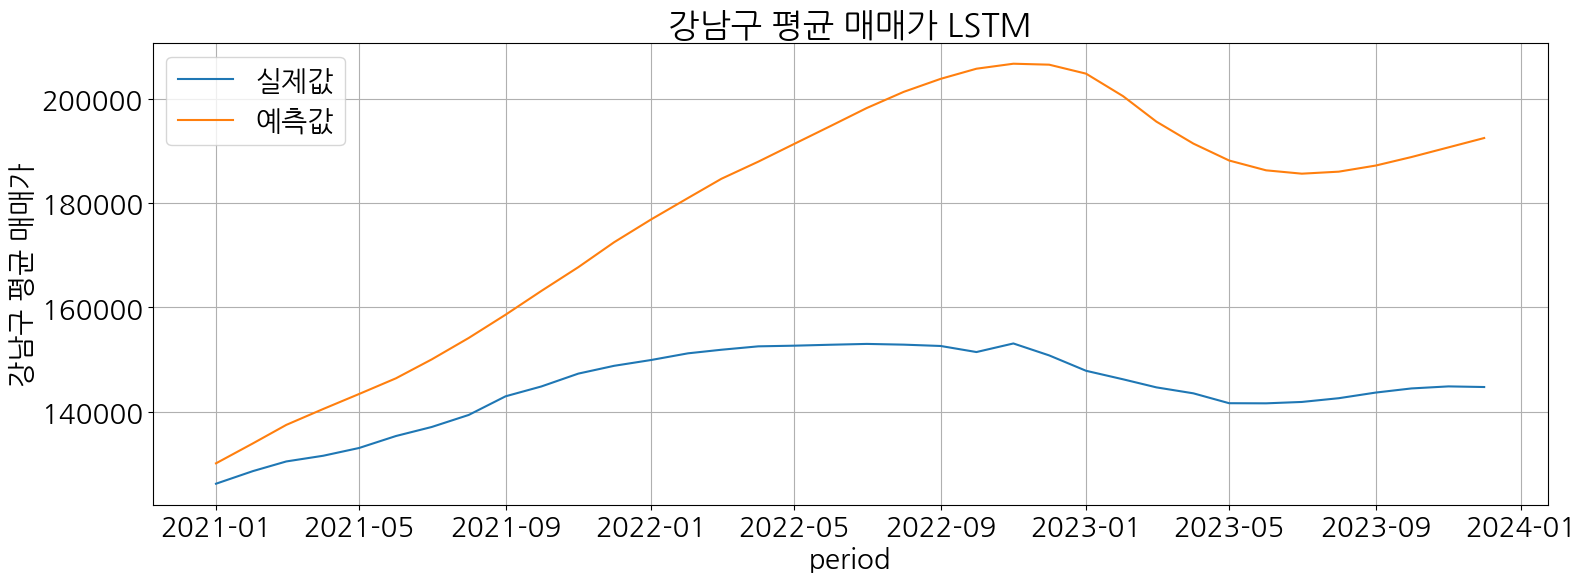

In [46]:
# 플롯에 나타내기
plt.figure(figsize=(18, 6))
plt.title('강남구 평균 매매가 LSTM')

plt.ylabel('강남구 평균 매매가')
plt.xlabel('period')

plt.plot(rescaled_pred_df['actual'], label='실제값')
plt.plot(rescaled_pred_df['predict'], label='예측값')

plt.grid()
plt.legend(loc='best')

plt.show()

In [47]:
# 평균절대값백분율오차계산 (MAPE)

print( np.sum(abs(y_test-pred)/y_test) / len(x_test) )

0.3824685777046788


### 최근 사용 알고리즘
* [GRU(Gated Reccurent Units)](https://wikidocs.net/22889)   
  : 뉴욕대 조경현 교수님. 리셋, 업데이트 2개 gate로 단순화. 데이터 양이 적을 때는 매개 변수의 양이 적은 GRU, 데이터 양이 더 많으면 LSTM
* Bidrenctional RNNs
* Multi Layer RNNs
* Attention Layer - BERT(순차적으로 모든 셀을 보지 않고, 집중해야 되는 부분만 attention)
* Transformer - GPT3(2021년 최신 Hot한 모델, Feed Forward Neural Nettwork 사용)

[Keras 공식 다큐먼트](https://keras.io/ko/callbacks/)